# ***Baekjoon***

<br></br>
### Q 11724. Back-Tracking
> https://www.acmicpc.net/problem/11724 <br>

***(Takeaway) keep an eye on 'recursion error' when using it!***
- Python is designed to have maximum recursion depth of 1,000.
- Recursion needs checkpoint to verify you've already visited.!!!! (!important)

- (condition) the number of M could be around N^2 -> from memory perspective, there is no different from using 'adj matrix' & 'adj list'. U'd better use 'adj matrix' for time perspective!

(my answer)

In [ ]:
import sys
sys.setrecursionlimit(10**6)

N, M = map(int, input().split())

m = [[0]*N for _ in range(N)] # generate adjacent matrix

for _ in range(M):
    a, b = map(lambda x: x-1, map(int, sys.stdin.readline().split())) # 런타임 에러 방지
    m[a][b] = m[b][a] = 1

def dfs(now):
    for nxt in range(N):
        if m[now][nxt]: # change all value with 1 to 0
            m[now][nxt] = 0 
            dfs(i) # of all connected node

r = 0
for i in range(N): 
    print(m[i])
    if 1 in m[i]: # if there still is a value with 1
        r += 1 # cuz they aren't connected
        dfs(i) # repeat process
        
print(r)

(better answer)

In [ ]:
import sys
sys.setrecursionlimit(10**6)

N,M = map(int, input().split())
adj = [[0]*N for _ in range(N)]
for _ in range(M):
    a,b = map(lambda x: x-1, map(int, input().split()))
    adj[a][b] = adj[b][a] = 1

def dfs(now):
    for nxt in range(N):
        if adj[now][nxt] and not chk[nxt]:
            chk[nxt] = True
            dfs(nxt)

chk = [False] * N # checkpoint for recursion

ans = 0
for i in range(N):
    if not chk[i]:
        ans += 1
        chk[i] = True
        dfs(i)

<br></br>
### Q 2178. Back Tracking
> https://www.acmicpc.net/problem/2178 <br>

- 아래 코드 문제점
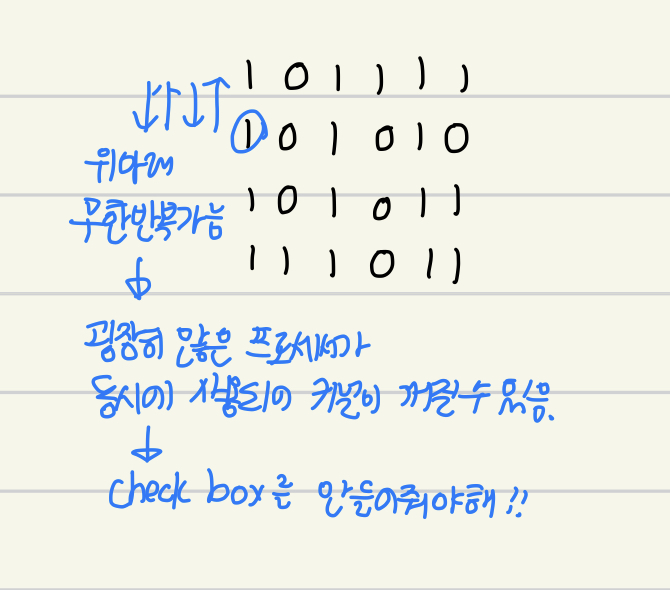

In [ ]:
from collections import deque

dy = (0, 1, 0, -1) # ← ↑ → ↓ 변화량 저장 
dx = (1, 0, -1, 0)

N,M = map(int,input().split())

board = [input() for _ in range(N)]

def is_valid_coord(y, x):
    return 0 <= y < N and 0 <= x < M

def bfs():
    chk = [[False] * M for _ in range(N)] # 방문 확인용 체크포인트 생성
    chk[0][0] = True
    dq = deque()
    dq.append((0,0,1)) # 1: 이동 회수 추가 기록
    while dq:
        y, x, d = dq.popleft()

        if y == N-1 and x == M-1:
            return d

        nd = d + 1 
        for k in range(4):
            ny = y + dy[k]
            nx = x + dx[k]
            if is_valid_coord(ny,nx) and board[ny][nx] == '1' and not chk[ny][nx]:
                chk[ny][nx] = True # 방문체크
                dq.append((ny,nx,nd))

print(bfs())